In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ви працюєте в HR відділі великої компанії. Керівництво компанії стурбоване відносно високою плинністю кадрів, і ваша команда повинна шукати шляхи зменшення кількості працівників, які залишають компанію. Команда повинна краще розуміти ситуацію, які співробітники, швидше за все, підуть і чому. Коли стане ясно, які фактори впливають на відтік співробітників, ви можете представити свої висновки разом із своїми ідеями щодо того, як зменшити плинність кадрів?
Також вам варто надати керівництву компанії алгоритм для прогнозування того, які співробітники найімовірніше залишать компанію найближчим часом.   

Дані щодо працівників компанії - employers.csv  
  
  
- department - відділ, до якого належить співробітник.  
- promoted - 1, якщо працівник отримав підвищення за попередні 24 місяці, 0 в іншому випадку.  
- review — зведена оцінка, яку працівник отримав під час останнього інтерв'ю з керівником відділу.  
- projects – у скількох проєктах бере участь співробітник.  
- salary - з міркувань конфіденційності зарплата представлена трьома рівнями: низька, середня, висока.  
- tenure - скільки років працівник працює в компанії.  
- satisfaction - оцінка задоволеності співробітників роботою в компанії.  
- bonus - 1, якщо працівник отримував премію за попередні 24 місяці, 0 в іншому випадку.  
- avg_hrs_month - середня кількість годин, відпрацьованих працівником за місяць.  
- left - "yes", якщо співробітник залишив компанію, "no" в протидежному випадку.  

In [26]:
data = pd.read_csv('/content/drive/MyDrive/magister_Python/employeers.csv')

In [27]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


Трансформуємо значення змінної "left" в 0 або 1

In [28]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


Аналіз на мультиколеніарність

In [29]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your feature matrix (excluding the target variable)
# Add a constant to the feature matrix for the intercept term
X_const = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Check for variables with high VIF (usually VIF > 10 is considered problematic)
problematic_variables = vif[vif["VIF"] > 10]

# Print the variables with high VIF
print("Variables with high VIF:")
print(problematic_variables)


Variables with high VIF:
        Variable           VIF
0          const  38774.308637
6         tenure     23.699471
9  avg_hrs_month     23.831378


Дані змінні мають високий взаємозв'язок з іншими факторами, їх можна не використовувати в подальшому дослідженні, або ретельно перевіряти результати, які вони нададуть у моделях та мати на увазі їхню можливу неточність

**Дослідження та візуалізація даних**

In [30]:
print(data.describe())



          promoted       review     projects       tenure  satisfaction  \
count  9540.000000  9540.000000  9540.000000  9540.000000   9540.000000   
mean      0.030294     0.651826     3.274843     6.556184      0.504645   
std       0.171403     0.085307     0.579136     1.415432      0.158555   
min       0.000000     0.310000     2.000000     2.000000      0.000000   
25%       0.000000     0.592884     3.000000     5.000000      0.386801   
50%       0.000000     0.647456     3.000000     7.000000      0.500786   
75%       0.000000     0.708379     4.000000     8.000000      0.622607   
max       1.000000     1.000000     5.000000    12.000000      1.000000   

             bonus  avg_hrs_month  
count  9540.000000    9540.000000  
mean      0.212055     184.661571  
std       0.408785       4.144831  
min       0.000000     171.374060  
25%       0.000000     181.472085  
50%       0.000000     184.628796  
75%       0.000000     187.728708  
max       1.000000     200.861656  


Для подальшого дослідження, трансформуємо категоріальні змінні

In [31]:
# Encode categorical variables
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])
data['salary'] = le.fit_transform(data['salary'])

# Split the data into features (X) and target (y)
X = data.drop('left', axis=1)
y = data['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Для того, щоб дізнатися, які фактори більш суттєво впливають на результуючу змінну, скористаємось класифікатором випадкового лісу

In [32]:
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


In [33]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8590146750524109
Confusion Matrix:
 [[1239   91]
 [ 178  400]]
Classification Report:
               precision    recall  f1-score   support

          no       0.87      0.93      0.90      1330
         yes       0.81      0.69      0.75       578

    accuracy                           0.86      1908
   macro avg       0.84      0.81      0.83      1908
weighted avg       0.86      0.86      0.86      1908



Побудована модель має непогану здатність прогнозування, дізнаємось найбільш вагомі фактори моделі

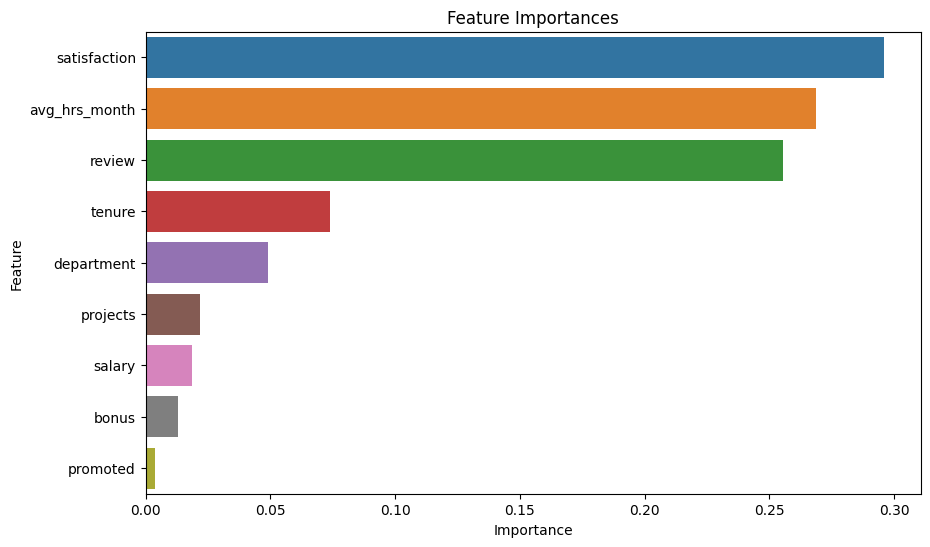

In [34]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


Маємо 3 найбільш впливаючі змінні, дослідимо вплив кожної з них окремо на результуючу змінну

Logistic Regression for "Satisfaction"

In [14]:
from sklearn.linear_model import LogisticRegression

# Create a DataFrame with only the "satisfaction" feature
X_satisfaction = data[['satisfaction']]
y = data['left']

# Split the data into training and testing sets
X_train_satisfaction, X_test_satisfaction, y_train, y_test = train_test_split(X_satisfaction, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_regression_satisfaction = LogisticRegression()
logistic_regression_satisfaction.fit(X_train_satisfaction, y_train)

# Predict on the test set
y_pred_satisfaction = logistic_regression_satisfaction.predict(X_test_satisfaction)

# Evaluate the model
print("Accuracy (Satisfaction):", accuracy_score(y_test, y_pred_satisfaction))
print("Confusion Matrix (Satisfaction):\n", confusion_matrix(y_test, y_pred_satisfaction))
print("Classification Report (Satisfaction):\n", classification_report(y_test, y_pred_satisfaction))


Accuracy (Satisfaction): 0.6970649895178197
Confusion Matrix (Satisfaction):
 [[1330    0]
 [ 578    0]]
Classification Report (Satisfaction):
               precision    recall  f1-score   support

          no       0.70      1.00      0.82      1330
         yes       0.00      0.00      0.00       578

    accuracy                           0.70      1908
   macro avg       0.35      0.50      0.41      1908
weighted avg       0.49      0.70      0.57      1908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression for "avg_hrs_month"

In [15]:
# Create a DataFrame with only the "avg_hrs_month" feature
X_avg_hrs_month = data[['avg_hrs_month']]

# Split the data into training and testing sets
X_train_avg_hrs_month, X_test_avg_hrs_month, y_train, y_test = train_test_split(X_avg_hrs_month, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_regression_avg_hrs_month = LogisticRegression()
logistic_regression_avg_hrs_month.fit(X_train_avg_hrs_month, y_train)

# Predict on the test set
y_pred_avg_hrs_month = logistic_regression_avg_hrs_month.predict(X_test_avg_hrs_month)

# Evaluate the model
print("Accuracy (avg_hrs_month):", accuracy_score(y_test, y_pred_avg_hrs_month))
print("Confusion Matrix (avg_hrs_month):\n", confusion_matrix(y_test, y_pred_avg_hrs_month))
print("Classification Report (avg_hrs_month):\n", classification_report(y_test, y_pred_avg_hrs_month))


Accuracy (avg_hrs_month): 0.6970649895178197
Confusion Matrix (avg_hrs_month):
 [[1330    0]
 [ 578    0]]
Classification Report (avg_hrs_month):
               precision    recall  f1-score   support

          no       0.70      1.00      0.82      1330
         yes       0.00      0.00      0.00       578

    accuracy                           0.70      1908
   macro avg       0.35      0.50      0.41      1908
weighted avg       0.49      0.70      0.57      1908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression for "review"

In [16]:
# Create a DataFrame with only the "review" feature
X_review = data[['review']]

# Split the data into training and testing sets
X_train_review, X_test_review, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_regression_review = LogisticRegression()
logistic_regression_review.fit(X_train_review, y_train)

# Predict on the test set
y_pred_review = logistic_regression_review.predict(X_test_review)

# Evaluate the model
print("Accuracy (review):", accuracy_score(y_test, y_pred_review))
print("Confusion Matrix (review):\n", confusion_matrix(y_test, y_pred_review))
print("Classification Report (review):\n", classification_report(y_test, y_pred_review))


Accuracy (review): 0.7426624737945493
Confusion Matrix (review):
 [[1300   30]
 [ 461  117]]
Classification Report (review):
               precision    recall  f1-score   support

          no       0.74      0.98      0.84      1330
         yes       0.80      0.20      0.32       578

    accuracy                           0.74      1908
   macro avg       0.77      0.59      0.58      1908
weighted avg       0.76      0.74      0.68      1908



Модель задоволеності: як модель "satisfaction", так і модель "avg_hrs_month" мають низьку точність, що свідчить про те, що ці моделі неефективно прогнозують плинність кадрів. Насправді, здається, вони передбачають лише один клас (0), а не інший (1), що призводить до великої кількості помилкових негативів (працівники, які фактично звільнилися, але за прогнозами не підуть).

Модель review: модель «review» має вищу точність порівняно з двома іншими моделями. Вона також має менше помилкових негативів, що вказує на певну передбачувану здатність. Проте ще є місце для вдосконалення.

Дослідимо взаємодію моделей та здатність передбачувати плинність кадрів за допомогою ансамблю моделей

Ensemble Models

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Split the data into training and testing sets for the Random Forest model
X_train_rf, X_test_rf, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train_rf, y_train)

# Create a VotingClassifier that combines the logistic regression "review" model and the Random Forest model
ensemble_model = VotingClassifier(estimators=[
    ('logistic_review', logistic_regression_review),
    ('random_forest', random_forest)
], voting='soft')  # 'soft' voting uses class probabilities for decision

# Train the ensemble model
ensemble_model.fit(X_train_rf, y_train)

# Predict on the test set using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_rf)

# Evaluate the ensemble model
print("Accuracy (Ensemble Model):", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix (Ensemble Model):\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report (Ensemble Model):\n", classification_report(y_test, y_pred_ensemble))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Ensemble Model): 0.8490566037735849
Confusion Matrix (Ensemble Model):
 [[1275   55]
 [ 233  345]]
Classification Report (Ensemble Model):
               precision    recall  f1-score   support

          no       0.85      0.96      0.90      1330
         yes       0.86      0.60      0.71       578

    accuracy                           0.85      1908
   macro avg       0.85      0.78      0.80      1908
weighted avg       0.85      0.85      0.84      1908



На основі результатів моделі ансамблю, яка поєднує модель «огляду» логістичної регресії та модель випадкового лісу, ви досягли значного підвищення точності приблизно на 85%. Ось короткий виклад висновків і рекомендацій для відділу кадрів:

1. Покращена продуктивність моделі:

Ансамблева модель, яка поєднує модель логістичної регресії "огляд" і модель випадкового лісу, показала гарні результати в прогнозуванні плинності кадрів. Вона має відносно високу точність 85%, що вказує на те, що вона краще ідентифікує працівників, які, ймовірно, покинуть компанію, порівняно з окремими моделями.

2. Ключові фактори:

Функція «review» була визначена як важливий фактор у прогнозуванні плинності кадрів. Це означає, що оцінка, яку працівники отримують під час останньої співбесіди з керівником відділу, відіграє вирішальну роль у визначенні того, чи ймовірно вони підуть чи залишаться.

3. Рекомендації для HR:

Виходячи з цих висновків, можна дати наступні рекомендації відділу кадрів щодо зниження плинності кадрів:

a. Зосередьтеся на відгуках співробітників: зверніть увагу на відгуки та оцінки, надані під час останніх співбесід співробітників з керівниками відділів. Визначте закономірності або загальні проблеми, згадані в цих оцінках, і вживіть заходів для їх вирішення.

b. Залучення та комунікація: покращуйте комунікацію між керівництвом і співробітниками. Переконайтесь, що співробітники відчувають себе почутими та що їхні проблеми вирішуються негайно.

в. Стратегії утримання: розробляйте та впроваджуйте стратегії утримання співробітників на основі інформації з відгуків співробітників. Це може включати програми наставництва, можливості розвитку кар’єри або покращення умов праці.

d. Регулярні опитування працівників: подумайте про проведення регулярних опитувань щодо задоволеності працівників, щоб постійно отримувати відгуки від працівників. Використовуйте ці дані, щоб відстежувати зміни в задоволеності роботою та завчасно вирішувати нові проблеми.